In [129]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import scipy.constants as sc
import scipy.interpolate as si
import scipy.stats as ss
import os

import matplotlib as mpl

key="full_width_10"

if key == "full_width_g":
    w=4.7
    h=w/1.618

if key == "insert":
    w=4.7/2*(30/41)
#    h=w/1.618
    h=2*30/41

if key == "half_width_g":
    w=4.7/2
#    h=w/1.618
    h=2
if key == "full_width_10":
    w=4.7
    h=5

mpl.rcParams['figure.figsize'] = [w, h]
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

In [130]:
def read_A_B(directory):
    
    extVA=[]
    extVB=[]
    einV=[]
    A=[]
    B=[]
    
    for root, dirs, files in os.walk(directory):
        for d in dirs:            
            dist.append(d.split('N')[0])
        for f in files:
            
            if 'vs' in f:
            
                if 'VA' in f:
                    f_split=f.split('V')
                    extVA.append(int(f_split[0]))
                    A_tmp=np.genfromtxt(root+'/'+f)
                    einV=A_tmp[1:,0]
                    A.append(A_tmp[1:,7])
                if 'VB' in f:
                    f_split=f.split('V')
                    extVB.append(int(f_split[0]))
                    B_tmp=np.genfromtxt(root+'/'+f)
                    B.append(B_tmp[1:,7])
    
    A_sort=[A for _,A in sorted(zip(extVA,A))]
    B_sort=[B for _,B in sorted(zip(extVB,B))]
    
    
    return extV,einV,A_sort,B_sort




In [131]:
extV,einV,A,B=read_A_B('A_B')

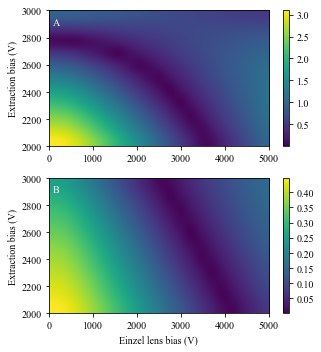

In [132]:
plt.subplot(211)
plt.imshow(A,extent=[min(einV),max(einV),min(extV),max(extV)],aspect='auto',interpolation='mitchell')
plt.ylabel('Extraction bias (V)')
plt.text(100,2950,'A',horizontalalignment='left',verticalalignment='top',color='w')
plt.colorbar()

plt.subplot(212)
plt.imshow(B,extent=[min(einV),max(einV),min(extV),max(extV)],aspect='auto',interpolation='mitchell')
plt.ylabel('Extraction bias (V)')
plt.xlabel('Einzel lens bias (V)')
plt.text(100,2950,'B',horizontalalignment='left',verticalalignment='top',color='w')
plt.colorbar()
plt.tight_layout()
plt.savefig('A_and_B_map.pdf',bbox='tight')